# Clasificación de objetos astronómicos


## Importación de librerías y de los datos

In [82]:
# Importación de las librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
# Importación de los datos
ruta = "/content/drive/MyDrive/CSVs/star_classification.csv"
dataset = pd.read_csv(ruta)

## Analisís de datos

La clasificación estelar, galáctica y de cuásares se basa en las características espectrales. Estas características permiten entender la composición y propiedades de estos objetos astronómicos. El conjunto de datos busca clasificarlos según estas características.

---

*   obj_ID = Identificador de objeto, el valor único que identifica el objeto en el catálogo de imágenes utilizado por el CAS

*   alpha = Ángulo de Ascensión Recta (epoch J2000)
*   delta = Ángulo de declinación (epoch J2000)
*   u = Filtro ultravioleta en el sistema fotométrico
*   g = Filtro verde en el sistema fotométrico
*   r = Filtro rojo en el sistema fotométrico
*   i = Filtro de infrarrojo cercano en el sistema fotométrico
*   z = Filtro infrarrojo en el sistema fotométrico
*   run_ID = Número de ejecución utilizado para identificar la exploración específica
*   rereun_ID = Número de repetición para especificar cómo se procesó la imagen
*   cam_col = Columna de cámara para identificar la línea de exploración dentro de la ejecución
*   field_ID = Número de campo para identificarlos
*   spec_obj_ID = ID único utilizado para los objetos espectroscópicos ópticos (esto significa que 2 observaciones diferentes con el mismo spec_obj_ID deben compartir la clase de salida).
*   class = clase de objeto (galaxia, estrella u objeto cuásar)
*   redshift = valor de corrimiento al rojo basado en el aumento de la longitud de onda
*   plate = ID de placa, identifica cada placa en SDSS
*   MDJ = Fecha juliana modificada, utilizada para indicar cuándo se tomó un dato determinado del SDSS.
*   fiber_ID = ID de fibra que identifica la fibra que apuntó la luz al plano focal en cada observación.




### Previsualización de los datos

In [85]:
# Se visualizan las primeras 5 filas del dataframe
dataset.head(14)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


Vista preliminar al dataset

In [86]:
# Comprobamos los tipos de datos y si hay valores nulos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

De esta información se pueden apreciar que no hay datos nulos y salvo la columna objetivo todas son númericas


---

### Distribución de las variables

In [87]:
# Con un describe() analizamos la distribución de los datos
dataset.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [88]:
# Preparamos el set de la paleta de colores y el estilo que usaré en las gráficas
sns.set_theme(style="darkgrid")
sns.set_palette("cubehelix", 1)

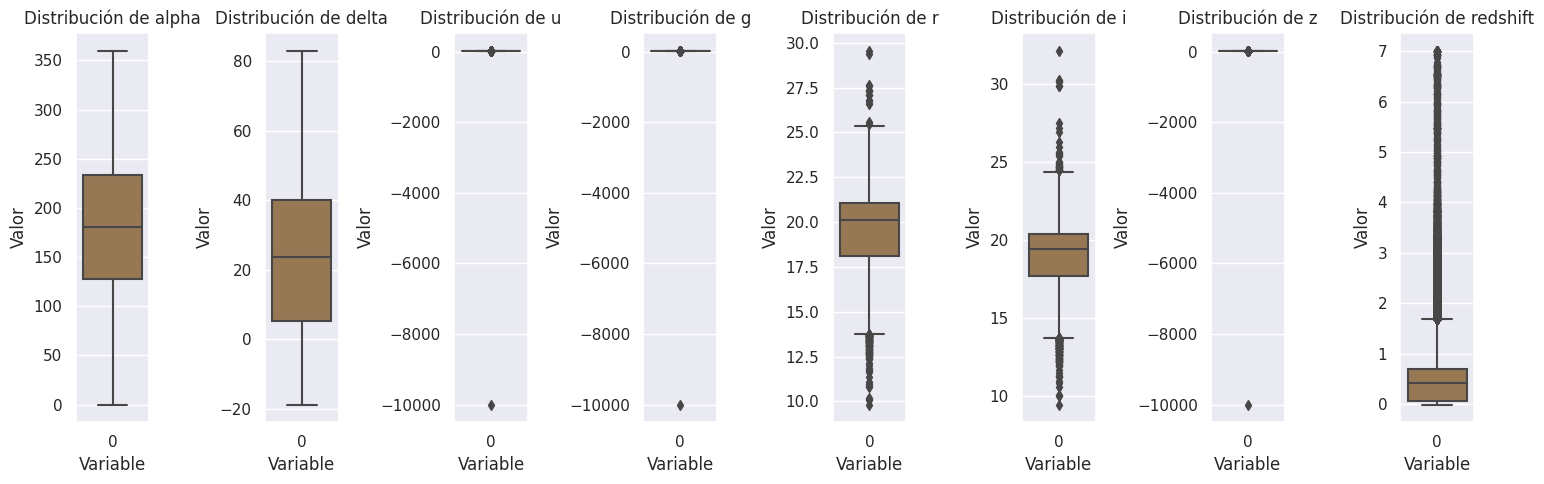

In [89]:
# Designamos las columnas númericas que no representan un id o similar
columns = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']

# Preparamos los subplot
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))

# Bucle for para generar los boxplot
for i, column in enumerate(columns):
    sns.boxplot(data=dataset[column], ax=axes[i])
    axes[i].set_xlabel('Variable')
    axes[i].set_ylabel('Valor')
    axes[i].set_title('Distribución de ' + column)

#Mostrar gráfico
plt.tight_layout()
plt.show()

Desde los boxplot se pude ver si hay outliers.

En este caso se aprecia en "u", "g" y "z" tienen prácticamente todos los datos en la media entre 18 y 21 pero tambien uno o más datos se van a -9999.
Estos podrían deberse a que esos valores específicos están siendo utilizados como marcadores especiales o códigos de error en el contexto del SDSS.

Respecto a "r" e "i" tienen valores por encima y por debajo del bulto de datos, lo cual indica objetos mas luminos o más tenues que la media o posibles errores de medición.

En el caso de redshift, los valores que parecen alejarse de la media y que van desde aproximadamente 2 hasta 7 indican lecturas de objetos muy lejanos

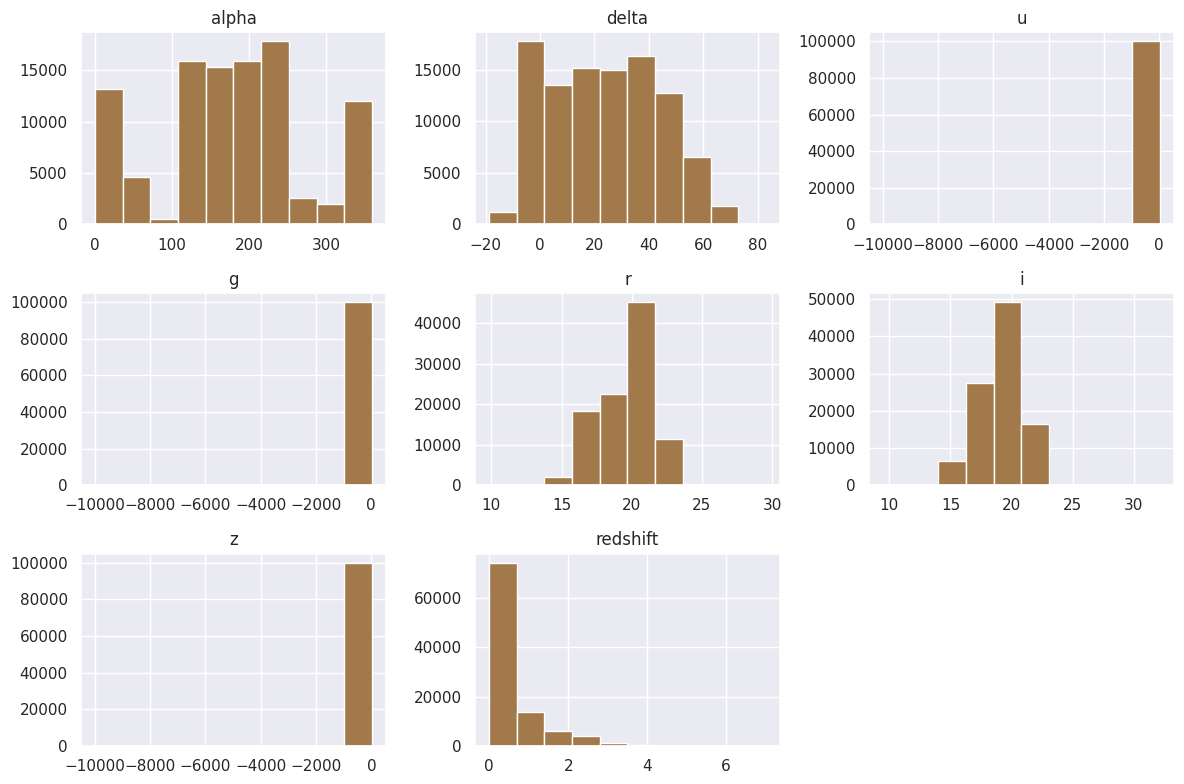

In [90]:
# Hacemos el histograma de cada columna anteriormente filtrada
dataset[columns].hist(figsize=(12, 8))

#Mostrar gráfico
plt.tight_layout()
plt.show()

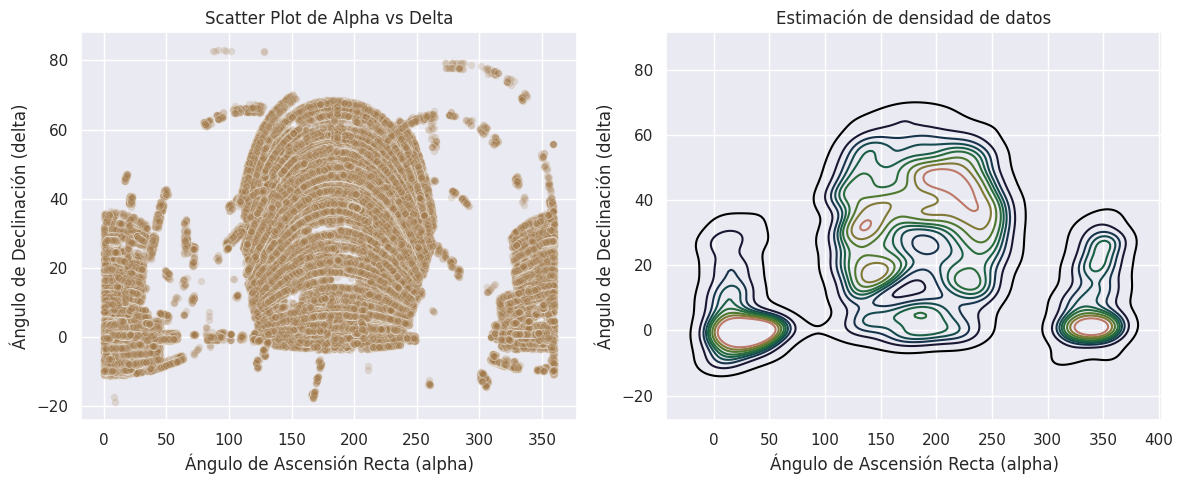

In [91]:
# Preparamos los subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Primer gráfico
sns.scatterplot(data=dataset, x='alpha', y='delta', s=30, alpha=0.2, ax=axes[0])
axes[0].set_xlabel('Ángulo de Ascensión Recta (alpha)')
axes[0].set_ylabel('Ángulo de Declinación (delta)')
axes[0].set_title('Scatter Plot de Alpha vs Delta')

# Segundo gráfico
ax = sns.kdeplot(data=dataset, x='alpha', y='delta', ax=axes[1], cmap="cubehelix")
axes[1].set_xlabel('Ángulo de Ascensión Recta (alpha)')
axes[1].set_ylabel('Ángulo de Declinación (delta)')
axes[1].set_title('Estimación de densidad de datos')

#Mostrar gráfico
plt.tight_layout()
plt.show()

Se utilizan el scatter y el kdeplot para tener información mas visual de como estan ubicados los objetos usando el delta y alpha. En la primera gráfica se aprecia claramente como se ubican mientras que en la segunda se ve la concentración de los mismos.

### Estudio de correlaciones

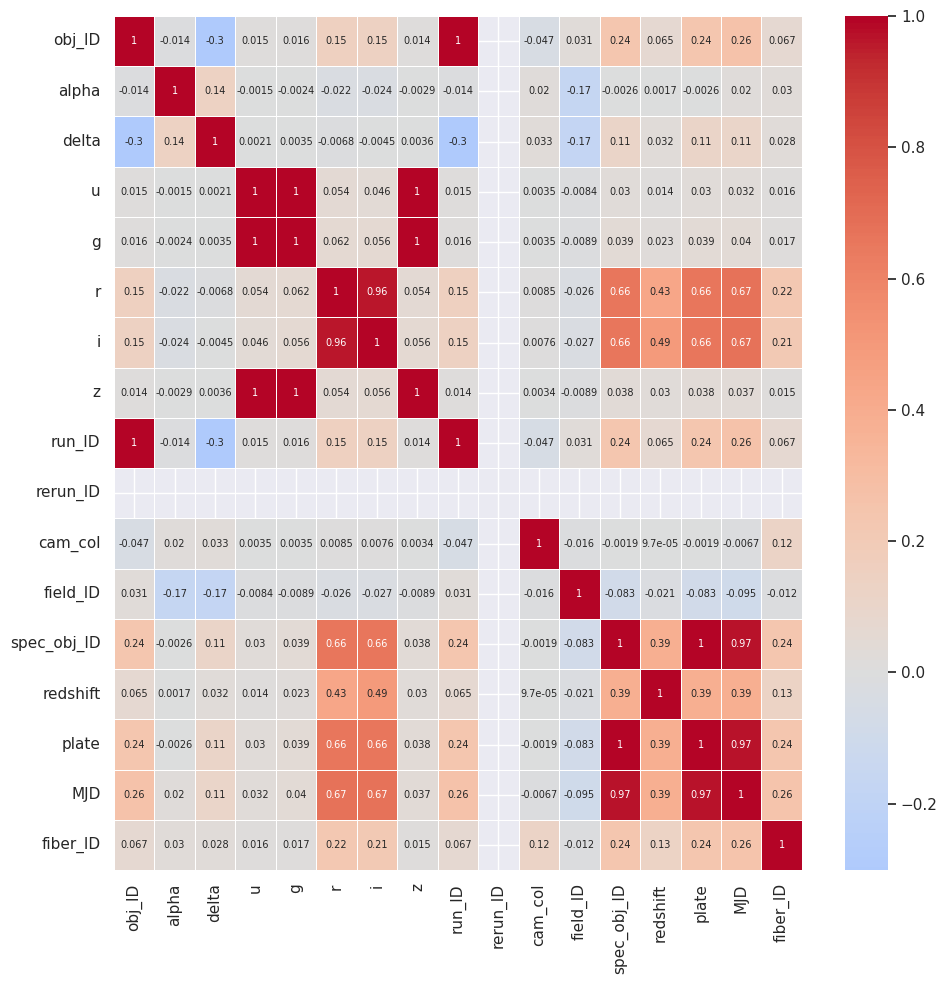

In [92]:
# Preparamos la matriz de correlaciones
corr_matrix = dataset.corr(numeric_only = True)

# Se hace un heatmap para tener información mas clara
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",center=0, linewidths=0.5, annot_kws={"size": 7}) # annot_kws se usa para cambiar el tamaño de el texto en las "cajas"
ax.set_title('Matriz de correlación')

#Mostrar gráfico
plt.tight_layout()
plt.show()

Omitiendo la información sobre IDs o similares se aprecia que "u", "g" y "z" están estrechamente relacionados al tener la correlación en 1.
"r" e "i" están en la misma situación con una correlación de 1 o muy cercana.
También hay una buena correlación entre "redshift" con "r" y "redshift" con "i".
Por último esta "MJD" con "r" o "i" que puede venir de que se usa la MJD (Modified Julian Date) para revisar la variabilidad de la luminosidad y patrones en el tiempo de los objetos.

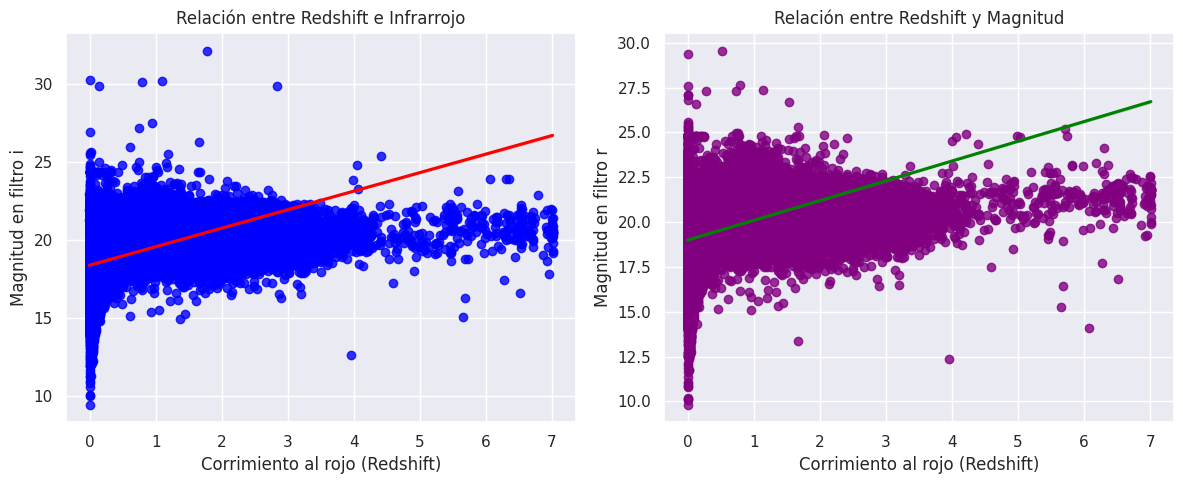

In [93]:
# Preparamos los subplot

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Primer gráfico
sns.regplot(data=dataset, x='redshift', y='i', line_kws={'color': 'red'}, scatter_kws={'color': 'blue'}, ax=axes[0])
axes[0].set_xlabel('Corrimiento al rojo (Redshift)')
axes[0].set_ylabel('Magnitud en filtro i')
axes[0].set_title('Relación entre Redshift e Infrarrojo')

# Segundo gráfico
sns.regplot(data=dataset, x='redshift', y='r', line_kws={'color': 'green'}, scatter_kws={'color': 'purple'}, ax=axes[1])
axes[1].set_xlabel('Corrimiento al rojo (Redshift)')
axes[1].set_ylabel('Magnitud en filtro r')
axes[1].set_title('Relación entre Redshift y Magnitud')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Se puede apreciar gracias a la linea de regresión que hay un ligero aumento en las variables "i" y "r" con respecto al "redshift"

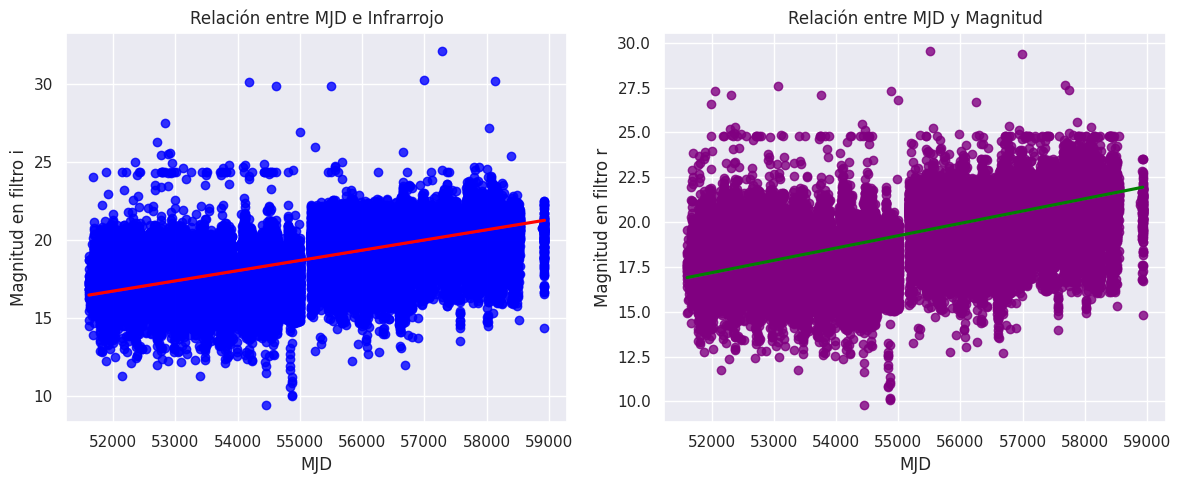

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Primer gráfico
sns.regplot(data=dataset, x='MJD', y='i', line_kws={'color': 'red'}, scatter_kws={'color': 'blue'}, ax=axes[0])
axes[0].set_xlabel('MJD')
axes[0].set_ylabel('Magnitud en filtro i')
axes[0].set_title('Relación entre MJD e Infrarrojo')

# Segundo gráfico
sns.regplot(data=dataset, x='MJD', y='r', line_kws={'color': 'green'}, scatter_kws={'color': 'purple'}, ax=axes[1])
axes[1].set_xlabel('MJD')
axes[1].set_ylabel('Magnitud en filtro r')
axes[1].set_title('Relación entre MJD y Magnitud')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Se aprecia tendencia al aumento de las variables "i" y "r" con respecto a "MJD"

### Balanceo de datos

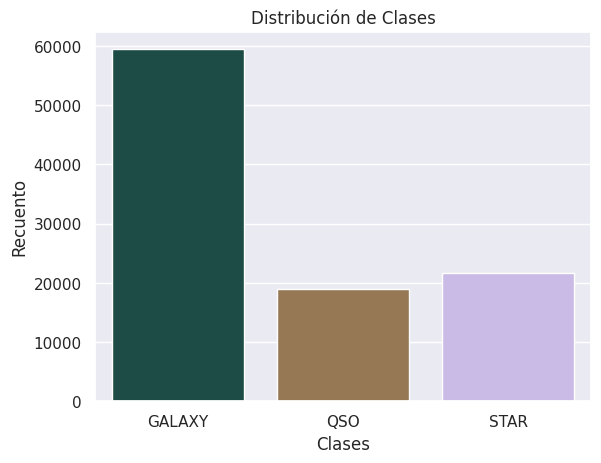

In [95]:
# Se hace un countplot para ver la cantidad de datos de cada label
sns.countplot(data=dataset, x='class', palette="cubehelix")
plt.xlabel('Clases')
plt.ylabel('Recuento')
plt.title('Distribución de Clases')

# Mostrar el gráfico
plt.show()

Se aprecia que 3/5 partes de los datos son de galaxias mientras que entre los cuasar y las estrellas los datos están mas balanceados.

---

### Transformación de datos

In [96]:
# Función para transformar datos
def cleaner(ruta):
  df = pd.read_csv(ruta) # Lectura de datos

  # Balanceo de datos
  aux = df[df["class"] == "GALAXY"]
  aux = aux.sample(frac=1/3, random_state=42) # Reducimos a un tercio las variables de GALAXY

  # Se eliminan las filas con GALAXY para concatenar el nuevo dataframe con datos GALAXY reducidos
  df = df.drop(df[df["class"] == "GALAXY"].index)
  df = pd.concat([df, aux])


  # Se eliminan las columnas de ID o similares
  columnas_a_eliminar = ["obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "spec_obj_ID", "plate", "fiber_ID"]
  df = df.drop(columnas_a_eliminar, axis=1)


  # Eliminar valores de "error"
  df = df[df["u"] != -9999]
  df = df.reset_index(drop=True) # Reseteo de índices

  # Se hace el label encoder y el split de datos
  X = df.drop('class', axis=1)
  y = df['class']
  label_encoder = LabelEncoder()
  y = label_encoder.fit_transform(y)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return df, X_train, X_test, y_train, y_test

# llamamos la función y se hace un describe para comprobar los cambios
df, X_train, X_test, y_train, y_test = cleaner(ruta)
df.describe()

,alpha,delta,u,g,r,i,z,redshift,MJD
count,60369.000000,60369.000000,60369.000000,60369.000000,60369.000000,60369.000000,60369.000000,60369.000000,60369.000000
mean,177.475561,24.602189,21.738386,20.442725,19.677216,19.230896,18.974014,0.676981,55692.746807
std,97.703802,19.824717,2.173197,1.967115,1.842178,1.785595,1.807067,0.901480,1804.399698
min,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971,51608.000000
25%,124.837202,5.330744,20.169670,18.977660,18.322480,17.975730,17.721630,0.000036,54480.000000
50%,180.757014,24.965796,21.733450,20.823880,20.134800,19.554290,19.202510,0.348696,55944.000000
75%,235.896297,40.859740,23.223090,21.851090,21.075940,20.620080,20.333150,1.026811,57041.000000
max,359.999810,83.000519,32.781390,30.607000,29.571860,32.141470,29.383740,7.011245,58932.000000


## Entrenamiento de modelos

### Creación de modelos

In [97]:
# Instancio los modelos
xgb_class = xgb.XGBClassifier()
rndf_class = RandomForestClassifier()
gdb_class = GradientBoostingClassifier()

In [98]:
random.seed(42)

### Primera aproximación con Machine Learning

In [99]:
# Entrenamiento con Random Forest para ver la precisión sin retoque de parámetros
rndf_class.fit(X_train, y_train)

# Realizar predicciones en el conjunto de train
y_pred = rndf_class.predict(X_train)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_train, y_pred)
print("Acuraccy:", accuracy)

Acuraccy: 1.0


En este caso se aprecia que la precisión es muy cercana a 1

In [100]:
# Entrenamiento con Xgboost para ver la precisión sin retoque de parámetros
xgb_class.fit(X_train, y_train)

# Realizar predicciones en el conjunto de train
y_pred = xgb_class.predict(X_train)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9912620354073921


En el xgboost tampoco llega a tener precisión de 1 sino muy cercano, por lo que se puede llegar a descartar el *overfitting*

In [101]:
# Entrenamiento con GradientBoosting para ver la precisión sin retoque de parámetros
gdb_class.fit(X_train, y_train)

# Realizar predicciones en el conjunto de train
y_pred = gdb_class.predict(X_train)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9756289470959727


En el GradientBoosting la precisión parece ser algo menor que tanto en Random Forest y Xgboost

Random Forest
Accuracy: 0.9744078184528739
F1-score: 0.9743825733895546
Recall: 0.9744078184528739
Precision: 0.9745742030490071



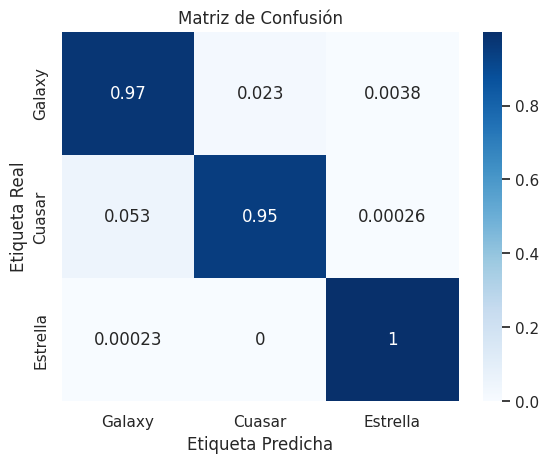


Xgboost
Accuracy: 0.9750703992049031
F1-score: 0.9750514740579991
Recall: 0.9750703992049031
Precision: 0.9752238440066956



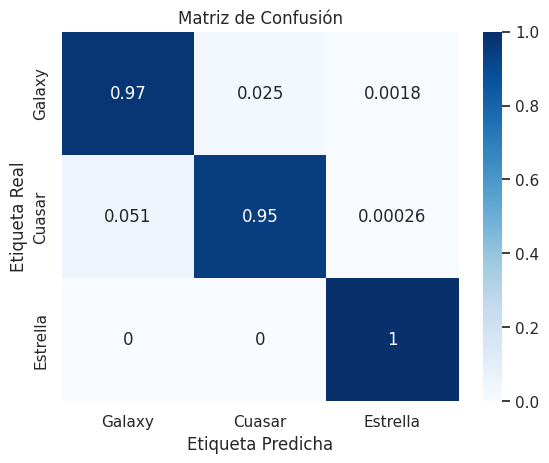


GradientBoosting
Accuracy: 0.9719231406327646
F1-score: 0.9719025080595612
Recall: 0.9719231406327646
Precision: 0.9722368373426834



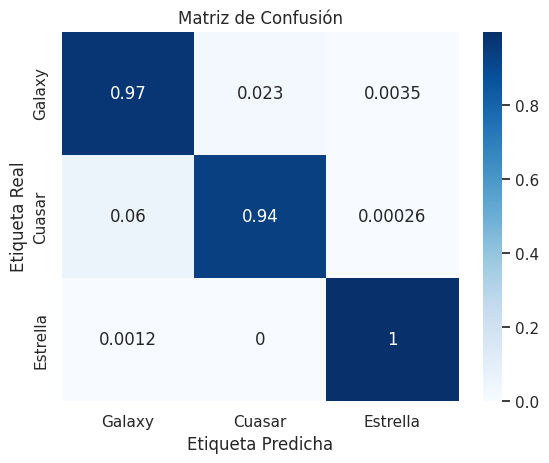

In [102]:
# Calcular las predicciones en el test set


# Random Forest
y_pred = rndf_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest")
print("Accuracy:", accuracy)
# Calcular el F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)
# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)
# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Obtener las etiquetas de las clases
class_labels = ['Galaxy', 'Cuasar', 'Estrella']
sns.heatmap(cm_norm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Agregar etiquetas y título
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

print("")
# Xgboost
y_pred = xgb_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Xgboost")
print("Accuracy:", accuracy)
# Calcular el F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)
# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)
# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Obtener las etiquetas de las clases
class_labels = ['Galaxy', 'Cuasar', 'Estrella']
sns.heatmap(cm_norm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Agregar etiquetas y título
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

print("")


# GradientBoosting
y_pred = gdb_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("GradientBoosting")
print("Accuracy:", accuracy)
# Calcular el F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)
# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)
# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Obtener las etiquetas de las clases
class_labels = ['Galaxy', 'Cuasar', 'Estrella']
sns.heatmap(cm_norm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Agregar etiquetas y título
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()
print("")

Aunque Xgbosst es superior, se puede ver que no hay una diferencia sustancial en las predicciones.

### Mejorar precisión Xgboost

Se hará una pequeña prueba para comprobar si cambiando el learning rate u otros parámetros

In [103]:
# CELDA de 50 m de ejecución

learning_rates = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
subsample_values = [0.5,1.0]
n_estimators_values = [50, 75, 100]
random_seed=42
max_values={'acc':0, 'Learning Rate':0, 'subsample':0, 'Estimators':0}
for rate in learning_rates:
    for subsample in subsample_values:
      for n_estimator in n_estimators_values:
        model = xgb.XGBClassifier(learning_rate=rate, subsample=subsample, random_state=random_seed, n_estimators=n_estimator)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > max_values["acc"]:
          max_values["acc"] = accuracy
          max_values["Learning Rate'"] = rate
          max_values["subsample"] = subsample
          max_values["Estimators"] = n_estimator

        print("Learning Rate:", rate)
        print("Subsample:", subsample)
        print("Estimators:", subsample)
        print("Accuracy:", accuracy)
        print("----------------------")

print(f"Los mejores valores son: {max_values}")


Learning Rate: 0.25
Subsample: 0.5
Estimators: 0.5
Accuracy: 0.9738280602948485
----------------------
Learning Rate: 0.25
Subsample: 0.5
Estimators: 0.5
Accuracy: 0.9743249958588703
----------------------
Learning Rate: 0.25
Subsample: 0.5
Estimators: 0.5
Accuracy: 0.9740765280768594
----------------------
Learning Rate: 0.25
Subsample: 1.0
Estimators: 1.0
Accuracy: 0.975567334768925
----------------------
Learning Rate: 0.25
Subsample: 1.0
Estimators: 1.0
Accuracy: 0.9754845121749213
----------------------
Learning Rate: 0.25
Subsample: 1.0
Estimators: 1.0
Accuracy: 0.975567334768925
----------------------
Learning Rate: 0.3
Subsample: 0.5
Estimators: 0.5
Accuracy: 0.9743249958588703
----------------------
Learning Rate: 0.3
Subsample: 0.5
Estimators: 0.5
Accuracy: 0.9744078184528739
----------------------
Learning Rate: 0.3
Subsample: 0.5
Estimators: 0.5
Accuracy: 0.9745734636408813
----------------------
Learning Rate: 0.3
Subsample: 1.0
Estimators: 1.0
Accuracy: 0.9744906410468775

Después de la prueba de parámetros se ve que no llega a haber una diferencia significativa al cambiar los mismos. Se podrían probar más parámetros pero no lo vemos necesario por el leve cambio en la accuracy

### Mejor modelo de machine learning

Xgboost
Accuracy: 0.9761470929269505
F1-score: 0.9761300256847448
Recall: 0.9761470929269505
Precision: 0.9762705048505225



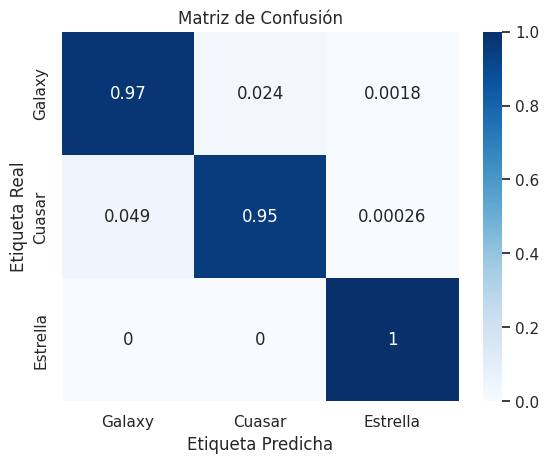

In [104]:
# Se define el "mejor" modelo probado
final_model = xgb.XGBClassifier(learning_rate=0.45, subsample=0.5, random_state=42, n_estimators=100)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Xgboost")
print("Accuracy:", accuracy)
# Calcular el F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)
# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)
# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Obtener las etiquetas de las clases
class_labels = ['Galaxy', 'Cuasar', 'Estrella']
sns.heatmap(cm_norm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Agregar etiquetas y título
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

### Primera aproximación con Deep Learning

In [105]:
# Se pasan los datos a tensores
data = torch.tensor(X_train.values, dtype=torch.float32)
labels = torch.tensor(y_train, dtype=torch.long)
data_test = torch.tensor(X_test.values, dtype=torch.float32)
labels_test = torch.tensor(y_test, dtype=torch.long)

In [106]:
# Se hace un one hot encoder para que coincidan las shape
num_classes = 3
labels_one_hot = torch.zeros(labels.shape[0], num_classes)
labels_one_hot.scatter_(1, labels.unsqueeze(1), 1)

tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])

In [107]:
labels_one_hot_test = torch.zeros(labels_test.shape[0], num_classes)
labels_one_hot_test.scatter_(1, labels_test.unsqueeze(1), 1)

tensor([[1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [108]:
# Se crea el modelo
def createANNmodel(learningRate):
  num_caracteristicas = data.shape[1]
  num_clases = torch.unique(labels).shape[0]
  # model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(num_caracteristicas,16),  # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(16,1),  # hidden layer
      nn.ReLU(),        # activation unit
      nn.Linear(1,num_clases),   # output unit
      nn.Softmax(dim=1) # Se usa softmax al ser un problema multiclase, ya que devuelve un vector con valores que suman 1
        )

  # loss function
  lossfun = torch.nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate) # El optimizador SGD aplica el algoritmo de descenso de gradiente estocástico para actualizar los pesos en cada iteración del entrenamiento

  # model output
  return ANNclassify,lossfun,optimizer

In [109]:
# Entrenaminento del modelo
numepochs = 1000

def trainTheModel(ANNmodel):

    torch.manual_seed(2)
    # Inicilizar las losses
    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):

        # forward pass
        yHat = ANNmodel(data)

        # calcular la loss
        loss = lossfun(yHat,labels_one_hot)
        losses[epochi] = loss.item()  # Update the value of losses

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ANNmodel(data)

    # calcular la acuraccy
    correct = torch.sum(torch.argmax(predictions, dim=1) == labels).item()
    total = labels.size(0)
    totalacc = 100 * correct / total

    return losses, predictions, totalacc


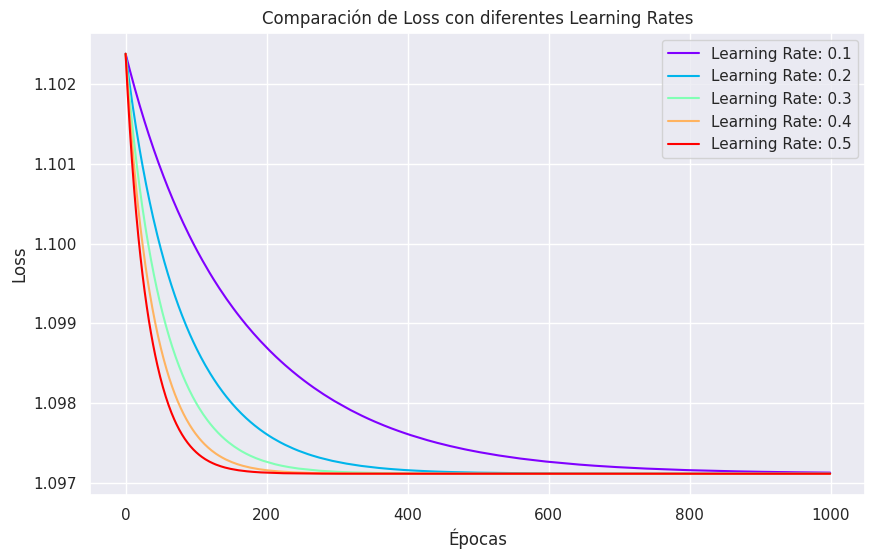

Mejor accuracy: 35.7842%


In [110]:
import numpy as np
import matplotlib.pyplot as plt

learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
loss_values = np.zeros((len(learning_rates), numepochs))  # Matriz para almacenar los valores de loss
acc=0

for i, lr in enumerate(learning_rates):
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses, predictions, totalacc = trainTheModel(ANNclassify)
    loss_values[i] = losses.detach()
    if totalacc > acc:
      acc = totalacc

# Generar el gráfico con las líneas de loss superpuestas
plt.figure(figsize=(10, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(learning_rates)))  # Generar colores distintos
for i, lr in enumerate(learning_rates):
    plt.plot(range(numepochs), loss_values[i], label='Learning Rate: {}'.format(lr), color=colors[i])

plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Comparación de Loss con diferentes Learning Rates')
plt.legend()
plt.show()

# report accuracy
print('Mejor accuracy: %g%%' %acc)

Se puede apreciar que aunque las losses alcanzan un llano mas rápido con 0.5 de Learning Rate todas quedan en una loss similar que además es considerablemente alta. La acuraccy demuestra que no ha ido bien ya que es solamente un 35.78%.

### Conclusión


Se puede ver que en este caso el problema es mucho más adecuado para machine learning que para deep learning, ya que los resultados sin ninguna busqueda exhaustiva de parámetros se consigue un resultado más que decente. Esto no significa que no se pueda llegar a conseguir un buen resultado con deep learning pero esto conllevaría una prueba de parámetros con un mayor coste de computo y de tiempo,algo que en este caso no sería necesario.

In [111]:
# Guardar modelo
final_model.save_model("/content/drive/MyDrive/modelo_xgboost.bin")

Se guarda el modelo de Xgboost entrenado